# Desafío Clase 19: Creación de modelo de predicción de Churn sobre una base de clientes de ecommerce tradicional (Negocio enfocado a la venta de mercancías generales).

## Overview

Nombre: **Abraham Ramírez Rodríguez** 

El presente notebook conjunta todo el análisis hecho en cada uno de los entregables de avance del proyecto final. 

El proyecto final pretende construir un modelo de Machine Learning del tipo **"supervisado"** y de **clasificación** que permita definir aquellos clientes que terminen su relación comercial con la empresa (negocio de ecommcer) y estos opten por comprar productos de mercancías generales (e.g. celulares, televisores, cómputo, tabletas electrónicas, línea blanca, electrodomésticos, muebles, etc.) con la competencia.

El notebook contine los siguientes puntos a desarrollar:

1. Definición de contexto comercial y motivación para la realización del análisis. 
2. Pre procesamiento de datos - Data Wrangling
3. Exploratory Data Analysis (EDA)

Las preguntas de negocio realizadas son las siguientes:

1. ¿Cómo se comporta la distribución mensual de nuestros clientes entre nuevos y no nuevos?
2. ¿Cómo lucen nuestros ratios de cancelación?
3. ¿Cuántos de nuestros clientes presentan Churn respecto a la proporción total de clientes?
4. ¿Cómo luce el Churn en función del método de pago de nuestros clientes?
5. ¿Cómo luce el Churn en función del canal de compra nuestros clientes?
6. ¿Cómo luce el Churn en función del nodo de orígen de las compras de nuestros clientes?
7. ¿Cómo luce el Churn en función del carrier de entrega de las compras de nuestros clientes?
9. ¿Cómo luce el Churn en función del tipo de clientes? (Nuevo o no nuevo)
10. ¿Cómo luce el ratio de descuentos en función de si un cliente presenta Churn o no? 
11. ¿Cómo luce el ticket promedio en función de si un cliente presenta Churn o no?
12. ¿Cómo luce la recencia en función de si un cliente presenta Churn o no?
13. ¿Cómo luce la distribución del basket size en función de un cliente que presenta Churn o no?
14. ¿Cómo luce la distribución costo de envío en función de un cliente que presenta Churn o no?
15. ¿Cómo lucen los ratios de cancelación en función de un cliente que presenta Churn o no?
16. ¿Cuáles son los principales motivos de cancelación entre aquellos clientes con Churn?


## Motivación

**Contexto comercial:**
El ecommerce ha crecido a pasos agigantados dentro del mercado Mexicano. Actualmente el negocio de comercio electrónicos ha generado sumas importantes de ingresos moneterio donde se extiende la posibilidad de poder ofrecer productos a todos los habitantes del país a tan solo 
un click, la posibilidad de comparar precios, tomar mejores decisiones de compra y mejorar la calidad de vida de nuestros clientes. Dado este crecimiento de dicha industria, cada vez tenemos más competidores adoptando este modelo de negocio y así poder ganar participación de mercado. En este caso trabajamos para una de las empresas de comercio electrónico más importantes del país enfocado principalmente en el negocio de **mercancías generales** (e.g.: Televisores, Línea Blanca, Electrodomésticos, Muebles de cocina, celulares, cómputo, patio y jardín, etc.). Los productos de índole "Groceries" o de "Primera necesidad" se venden a través de otra unidad/departamento de la empresa negocio.

La empresa tuvo un crecimiento importante durante la pandemia, beneficiandose en mayor adquisición de ingresos y clientes nuevos. Este crecimiento se ha visto sostenible durante los años posteriores al 2020, donde ahora, la **estrategia comercial a adopatar** es la retención de nuestros clientes nuevos clientes adquiridos, es decir, lograr su fidelización y mantener nuestro negocio en el top of mind de engagement de compra y el **path to profitability**. Con ello, adoptar **estrategias claves de retención de clientes** y mantener una mayor frecuencia de compra a través de clientes no nuevos es importante para identificar el **loyalty** que nuestros clientes tienen sobre la marca. También, con el modelo de predicción de Churn se pretende mantener en niveles óptimos el índice CAC (Customer Acquisition Cost) ya que atraer clientes nuevos suele tener un mayor costoque establecer estrategias de retención sobre aquellos clientes que ya nos habían realizado una compra en el pasado. 

Con lo anterior, las empresa nos ha contratado para crear un modelo de predicción del **Churn** de los clientes que permita identificar próximos clientes que abandonen su relación de compra con el negocio y en base a esto, detonar acciones estratésgicas que impulsen la retención de compra de estos clientes. 

El modelo de predcción consideraría distintas variables cuyo objetivo es explicar el comportamiento de **"Churn"** de un cliente y así clasificarlos como "alto riesgo de abandono" o "engaged", es decir, es un cliente retenido. 

**Problema comercial:**
Nuestra tarea inicial como Data scientist es construir visualizaciones que permitan a la empresa sacar insights sobre la retención de los clientes y responder una serie de preguntas que se plantean a continuación así como la creación de un modelo de predicción que permita determinar clientes potenciales  

**Contexto Analítico**
Se proporciona una base de información en CSV donde nos permite visualizar la información de ventas por ID del customer, pedido, productos pagados, descuentos aplicados, cancelaciones, canales de compra, métodos de pago, etc. Se realizarán los siguiente pasos para construir la información requerida:
1. Leer el archivo de datos
2. Transformar y procesar campos adicionales para la construicción de subconjuntos de datos que nos permitan realizar el análisis. 
3. Construir visualizaciones para idenetificar y extraer insights de los datos.


## Preprocesamiento de datos - Data Wrangling

In [1]:
#Configuración y lectura de datos. También imprimimos 
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.style.use("bmh")
warnings.filterwarnings("ignore")


route = "C:/Users/abrah/Documents/"

df = pd.read_csv(route + "Ecommerce_Transactions_2021.csv", sep = '|', encoding = 'UTF8') #Leemos nuestros datos através de un archivo CSV e imprimios las columnas contenidas así como su data type que manejan por default.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16692886 entries, 0 to 16692885
Data columns (total 98 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   Unnamed: 0                            int64  
 1   Almacen de Origen                     object 
 2   Almacen detalle                       object 
 3   banco                                 object 
 4   Bandera bundle final                  object 
 5   Bandera CBT                           object 
 6   Bandera pagos                         object 
 7   canal                                 object 
 8   Canal_formato_SO                      object 
 9   cantidad                              int64  
 10  Carrier                               object 
 11  CATEGORIA                             object 
 12  Categoria ecomm                       object 
 13  CLICK AND COLLECT                     object 
 14  codigo postal                         float64
 15  Comision MKP 

In [2]:
#Kepp only those transactions whose payment was confirmed. This particular setting allow us to discard any bot activity on site and ignore bias by those customer who, for unknown reason, didn't end up completing the purchase, agnostic to business service levels. 
#Saying so, we would need in a great majority "PAY AT STORE" transactions. We wouldn't get rid of all the transacion through this payment method.  
df = df.loc[df.loc[:,"Fecha de confirmacion"].notna(),:]

In [3]:
## Transforma los tipos de datos oríginales de las distintas variables a los tipos que necesitamos para manipular la información. 
df["FECHA DE CREACION"] = pd.to_datetime(df["FECHA DE CREACION"], format  = "%Y-%m-%d")
df["Fecha de confirmacion"] = pd.to_datetime(df["Fecha de confirmacion"], format  = "%Y-%m-%d")
df["Fecha de cancelacion"] = pd.to_datetime(df["Fecha de cancelacion"], format  = "%Y-%m-%d")
df["FECHA DE CREACION CON HORA"] = pd.to_datetime(df["FECHA DE CREACION CON HORA"],format= '%Y-%m-%d %H:%M:%S')
#df["fecha de embarque"] = pd.to_datetime(df["fecha de embarque"], format  = "%Y-%m-%d")
#df["Fecha de entrega"] = pd.to_datetime(df["Fecha de entrega"], format  = "%Y-%m-%d")
#df["Fecha maxima de entrega"] = pd.to_datetime(df["Fecha maxima de entrega"], format  = "%Y-%m-%d")
#df["Fecha minima de entrega"] = pd.to_datetime(df["Fecha minima de entrega"], format  = "%Y-%m-%d")

df["Año"] = df["FECHA DE CREACION"].dt.year
df["Mes"] = df["FECHA DE CREACION"].dt.month
df["Dia"] = df["FECHA DE CREACION"].dt.day

#Simple imputting process. 
df["Venta bruta sin descuentos con flete"] = df["Venta bruta sin descuentos con flete"].fillna(0)
df["cantidad"] = df["cantidad"].fillna(0)
df["Piezas canceladas"] = df["Piezas canceladas"].fillna(0)
df["Venta cancelada"] = df["Venta cancelada"].fillna(0)
df["Total_venta"] = df["Venta bruta sin descuentos con flete"] + df["Venta cancelada"]
df["Total_piezas"] = df["Piezas canceladas"] + df["cantidad"]


In [4]:
churn_window = 3  #Define a Churn Window of 3 Months.  
max_date = df.loc[:,"FECHA DE CREACION"].max()
cut_off =  max_date - pd.DateOffset(months = churn_window)

customers_grouped = df.groupby(['Customer_ID']).agg({'FECHA DE CREACION CON HORA': 'max'}).reset_index()
customers_grouped.rename(columns = {'FECHA DE CREACION CON HORA':"lastPurchaseDate"}, inplace=True)
#Assign a customer with positive churn if it hasn't made any purchase in the  days_threshold
customers_grouped["Churn"] = np.where(customers_grouped.lastPurchaseDate <= cut_off,1,0)
customers_grouped["Churn_label"] = np.where(customers_grouped.Churn == 1, "Churn","No Churn")

#Label variables
#Estado, Channel Grouped, Almacen de origen, Categoría de compra, Carrier, Motivo de cancelacion, Tipo de pago, Tipo cliente
#Seguiremos una atribución del tipo "Last Touch". Podemo probar posteriormente una atribución el tipo 
group_attributes = pd.merge(left=df, right=customers_grouped, left_on= ["Customer_ID","FECHA DE CREACION CON HORA"], right_on=["Customer_ID","lastPurchaseDate"], how = 'inner').drop_duplicates(subset=["Customer_ID","lastPurchaseDate"]) # .drop_duplicates(subset=["Mail","NUMERO PEDIDO"])
group_attributes = group_attributes.loc[:,["Customer_ID","Estado republica","Canal_grouped","New_canal","Almacen de Origen","CATEGORIA","Carrier","Motivo de cancelacion","tipo de pago","Tipo_cliente"]] # Sesgo en pedidos multilineas, la categoría, el carrier , almacen y motivo de cancelacón estaría sesgado

df_customer = df.groupby(["Customer_ID"]).agg({'Total_venta': np.sum, 'Order_ID': lambda x: x.nunique(), 'Total_piezas': np.sum, 'upc': lambda x: x.nunique(),
        'Venta bruta sin descuentos con flete': np.sum, 'Flete': np.sum, 'Total descuentos': np.sum, 'Venta cancelada': np.sum, 'Piezas canceladas':np.sum})

df_customer = pd.merge(df_customer, customers_grouped, how = 'left', left_on = 'Customer_ID', right_on = 'Customer_ID')
df_customer = pd.merge(df_customer, group_attributes, how = 'left', left_on = 'Customer_ID', right_on = 'Customer_ID')

df_customer["Max_date"] = max_date
df_customer["Recency"] = (df_customer.loc[:,"Max_date"] - df_customer.loc[:,"lastPurchaseDate"]).dt.days
df_customer #Imprime una muestra de como luce nuestro conjunto de datos hasta este punto.

,Customer_ID,Total_venta,Order_ID,Total_piezas,upc,Venta bruta sin descuentos con flete,Flete,Total descuentos,Venta cancelada,Piezas canceladas,...,Canal_grouped,New_canal,Almacen de Origen,CATEGORIA,Carrier,Motivo de cancelacion,tipo de pago,Tipo_cliente,Max_date,Recency
0,C1,128.450000,1,1.0,1,128.450000,0.000000,732.76,0.0,0.0,...,A_Digitales,A_Web,FC,Home Automation + Telefonía Fija,MXFDD,NaN,PayPal,Nuevo,2023-06-10,575
1,C10000,9481.892759,1,1.0,1,9481.892759,0.002759,1293.11,0.0,0.0,...,Kiosco_B,Kiosco_B,FC,Fotografía,MXFDD,NaN,Pago en tienda,Nuevo,2023-06-10,629
2,C100000,58395.163103,10,13.0,10,58395.163103,466.383103,23066.90,0.0,0.0,...,Kiosco_B,Kiosco_B,MKP,Línea Blanca y Electrodomésticos,Seller_Owned,NaN,Pago en tienda,No nuevo,2023-06-10,3
3,C1000000,51163.835862,7,9.0,8,51163.835862,118.965862,7361.17,0.0,0.0,...,Kiosco_B,Kiosco_B,MKP,TV y Video,Seller_Owned,NaN,Tarjeta de crédito,No nuevo,2023-06-10,5
4,C1000002,3070.016552,3,5.0,5,3070.016552,0.006552,208.62,0.0,0.0,...,A_Digitales,A_Web,DSV,Deportes,MX-FEDX,NaN,Tarjeta de débito,No nuevo,2023-06-10,416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5430819,C999991,11357.058621,3,3.0,2,11357.058621,118.098621,1732.59,0.0,0.0,...,A_Digitales,A_App,FC,Celulares,MX-FEDX,NaN,Tarjeta de crédito,No nuevo,2023-06-10,39
5430820,C999992,4134.480000,1,4.0,1,4134.480000,0.000000,1137.92,0.0,0.0,...,A_Digitales,A_Web,FC,Autos y Llantas,MX-FEDX,NaN,Tarjeta de crédito,Nuevo,2023-06-10,574
5430821,C999994,11238.103448,2,2.0,1,11238.103448,67.243448,1241.20,0.0,0.0,...,Kiosco_A,Kiosco_A,DSV,Celulares,MX-FEDX,NaN,Pago en tienda,Nuevo,2023-06-10,134
5430822,C999997,3987.100000,1,1.0,1,3987.100000,0.000000,0.01,0.0,0.0,...,Kiosco_A,Kiosco_A,MKP,Videojuegos,MX-FEDX,NaN,Tarjeta de crédito,No nuevo,2023-06-10,636


In [6]:
#Creación de columnas adicionales. 
# Get rid of the columns we're not interested on keeping for our analysis. 
df_customer.drop(columns=['lastPurchaseDate'],inplace=True)

#Raname some columns for getting better reference of the metrics we're referring to.
df_customer.rename(columns = {'Total_venta': 'Total_income', 'Order_ID': 'Purchase_frequency','upc':'Unique_Products_purchased'}, inplace = True) ## Total revenue aported to the business

df_customer["Avg_basket_size"] = df_customer.loc[:,"Total_piezas"] / df_customer.loc[:,"Purchase_frequency"]  
df_customer["Avg_order_value"] = df_customer.loc[:,"Total_income"] / df_customer.loc[:,"Purchase_frequency"]  
df_customer["Ratio_sales_cancelled"] = df_customer.loc[:,"Venta cancelada"] / df_customer.loc[:,"Total_income"]  
df_customer["Ratio_items_cancelled"] = df_customer.loc[:,"Piezas canceladas"] / df_customer.loc[:,"Total_piezas"]  
df_customer["Avg_Shipment_cost_ratio"] =  df_customer.loc[:,"Flete"] / df_customer.loc[:,"Venta bruta sin descuentos con flete"]  
df_customer["Discount_ratio"] =  df_customer.loc[:,"Total descuentos"]  / (df_customer.loc[:,"Venta bruta sin descuentos con flete"])
df_customer["Avg_Shipment_cost_ratio"] = df_customer["Avg_Shipment_cost_ratio"].fillna(0)
df_customer["Discount_ratio"] = df_customer["Discount_ratio"].fillna(0)
#Unos últimos pasos
df_customer["Ratio_sales_cancelled"]  =  df_customer["Ratio_sales_cancelled"].fillna(0)
df_customer["Ratio_items_cancelled"]  =  df_customer["Ratio_items_cancelled"].fillna(0)

#Seleccionamos solo las variables.
#df_customer = df_customer.loc[:,["Customer_ID","Total_income","Purchase_frequency","Unique_Products_purchased","Recency","Avg_basket_size","Avg_order_value","Ratio_sales_cancelled","Ratio_items_cancelled","Avg_Shipment_cost_ratio","Discount_ratio"]]

In [5]:
#Imprimimos una muestra de nuestra base final.
df_customer.head(15)

,Customer_ID,Total_venta,Order_ID,Total_piezas,upc,Venta bruta sin descuentos con flete,Flete,Total descuentos,Venta cancelada,Piezas canceladas,...,Canal_grouped,New_canal,Almacen de Origen,CATEGORIA,Carrier,Motivo de cancelacion,tipo de pago,Tipo_cliente,Max_date,Recency
0,C1,128.450000,1,1.0,1,128.450000,0.000000,732.76,0.0,0.0,...,A_Digitales,A_Web,FC,Home Automation + Telefonía Fija,MXFDD,NaN,PayPal,Nuevo,2023-06-10,575
1,C10000,9481.892759,1,1.0,1,9481.892759,0.002759,1293.11,0.0,0.0,...,Kiosco_B,Kiosco_B,FC,Fotografía,MXFDD,NaN,Pago en tienda,Nuevo,2023-06-10,629
2,C100000,58395.163103,10,13.0,10,58395.163103,466.383103,23066.90,0.0,0.0,...,Kiosco_B,Kiosco_B,MKP,Línea Blanca y Electrodomésticos,Seller_Owned,NaN,Pago en tienda,No nuevo,2023-06-10,3
3,C1000000,51163.835862,7,9.0,8,51163.835862,118.965862,7361.17,0.0,0.0,...,Kiosco_B,Kiosco_B,MKP,TV y Video,Seller_Owned,NaN,Tarjeta de crédito,No nuevo,2023-06-10,5
4,C1000002,3070.016552,3,5.0,5,3070.016552,0.006552,208.62,0.0,0.0,...,A_Digitales,A_Web,DSV,Deportes,MX-FEDX,NaN,Tarjeta de débito,No nuevo,2023-06-10,416
5,C1000003,861.210000,1,1.0,1,861.210000,0.000000,0.00,0.0,0.0,...,A_Digitales,A_Web,FC,Juguetería,MX-FEDX,NaN,Tarjeta de crédito,Nuevo,2023-06-10,541
6,C1000007,11874.120000,1,2.0,2,11874.120000,167.240000,2155.19,0.0,0.0,...,Kiosco_B,Kiosco_B,FC,Línea Blanca y Electrodomésticos,MXFLD,NaN,Pago en tienda,Nuevo,2023-06-10,880
7,C1000009,1723.270000,1,1.0,1,1723.270000,0.000000,431.03,0.0,0.0,...,A_Digitales,A_Web,FC,Bebés,PExp,NaN,Tarjeta de crédito,Nuevo,2023-06-10,500
8,C1000010,3704.290690,2,3.0,3,3704.290690,0.000690,0.02,0.0,0.0,...,Kiosco_A,Kiosco_A,MKP,"Muebles, maletas y tapetes",MX-FEDX,NaN,Tarjeta de crédito,No nuevo,2023-06-10,460
9,C1000011,3792.230000,1,1.0,1,3792.230000,0.000000,0.01,0.0,0.0,...,Kiosco_B,Kiosco_B,MKP,Ferretería,MX-FEDX,NaN,Pago en tienda,Nuevo,2023-06-10,99


## Exploratory Data Analysis (EDA)

### Tratamiento de datos ausentes y outliers

#### **Datos ausentes**

La ausencia de datos en nuestra base de información no es del todo crítico ya que disponemos de la información más vital como ventas, ticket promedio, piezas, pedidos y sus diferentes atributos como "Canal de compra", "Nodo de orígen de la mercancía", "Banco", "Estatus de un pedido", etc. 

De igual manera, se utilizará la librería: "missingno" para tener un visazto de como se ve una muestra de nuestro dataset en términos de distribución de datos faltantes:


<AxesSubplot:>

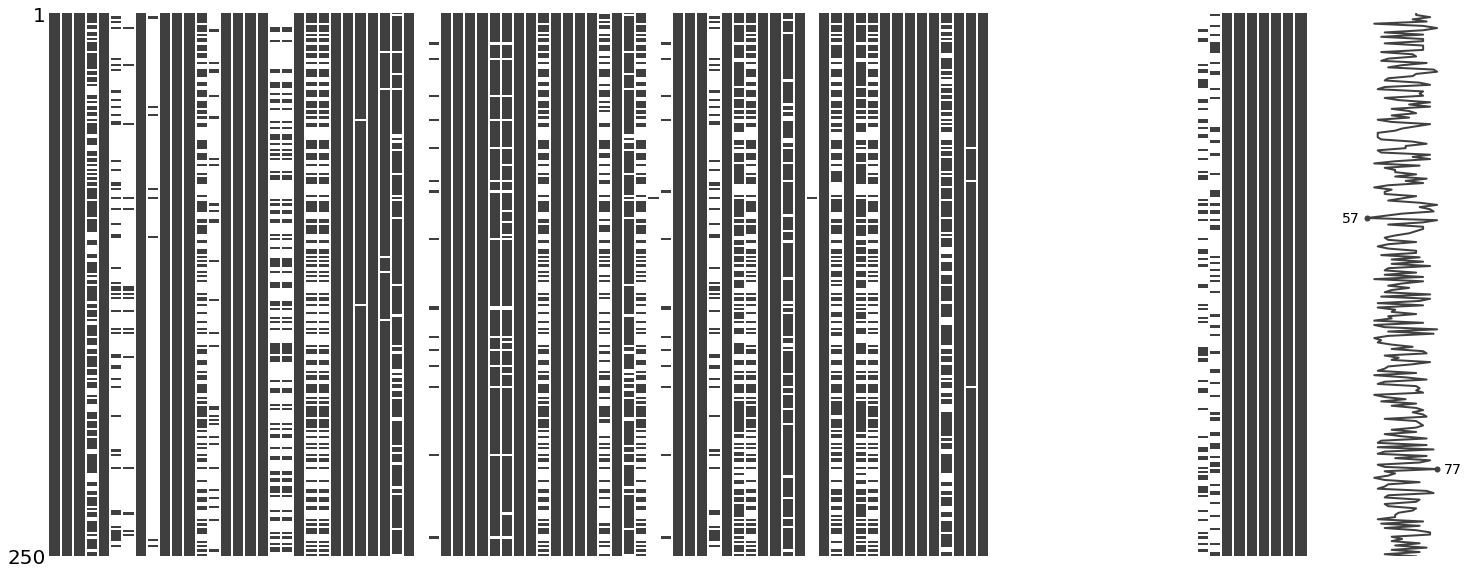

In [8]:
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(250))

#### **Tratamiento y reconocimiento de datos atípicos o Outliers en nuestra base agrupada de Clientes. | Análisis univariado**

A continuación, harémos una exploración de los datos nulos que tenemos en nuestra base de datos final y veremos los Outliers presentes en la base.

Harémos la revisión de valores atípicos mediante el rango interquantil para identificar todas las variables con valores nulos y así identificarlos para tenerlos en consideración en nuestro modelo. También, este análisis nos permite identificar de manera individual (univariado) la distribución de cada una de las variables.

Primero, observaremos los gráficos correspondientes mediante Boxplots para identificar visualmente los los outliers

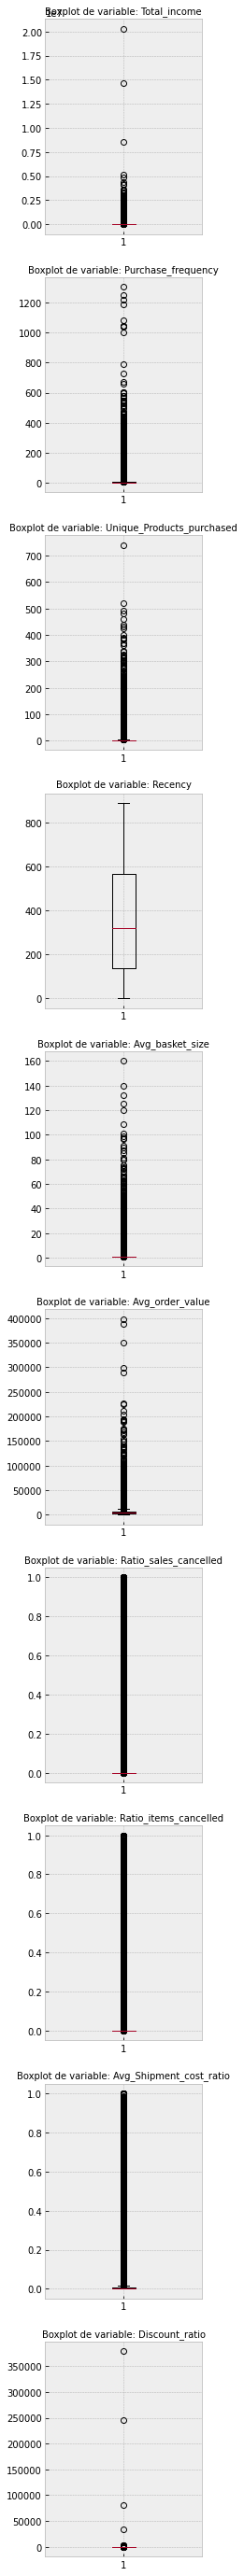

In [10]:
#Definimos en una lista las columnas a analizar para el tratamiento de Outliers.
columns = ['Total_income', 'Purchase_frequency','Unique_Products_purchased', 'Recency', 'Avg_basket_size',
       'Avg_order_value', 'Ratio_sales_cancelled',
       'Ratio_items_cancelled', 'Avg_Shipment_cost_ratio',
       'Discount_ratio']

import matplotlib.pyplot as plt
import seaborn as sns

fig, x = plt.subplots(len(columns),1, figsize = (3,50))
i = 0
for column in columns:
    x[i].boxplot(df_customer.loc[:,column])
    x[i].set_title("Boxplot de variable: " + column, fontsize = 10)
    i+= 1

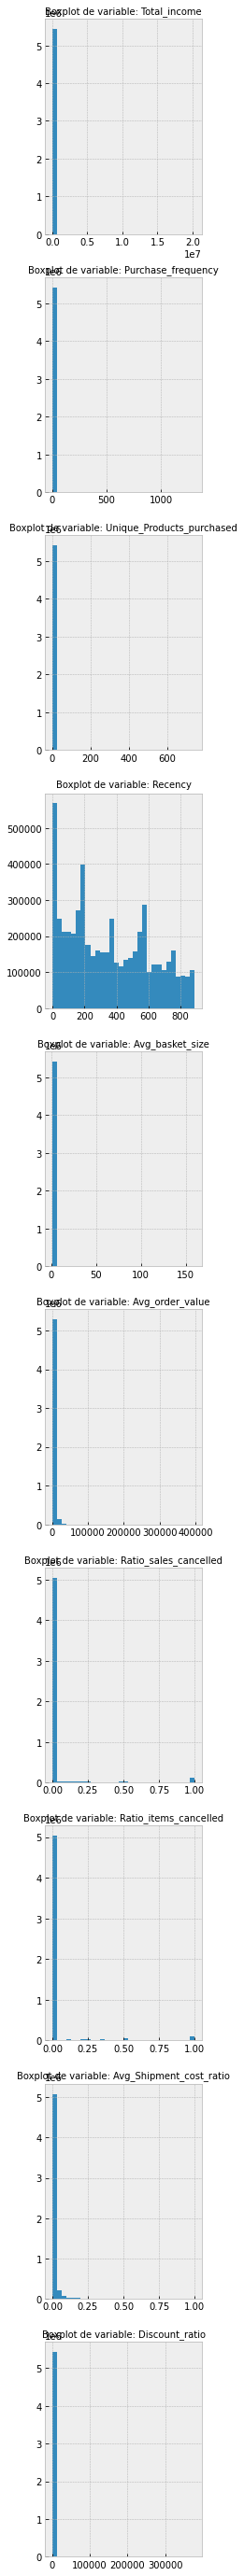

In [11]:
# Histograma de frecuencias
fig, x = plt.subplots(len(columns),1, figsize = (3,50))
i = 0
for column in columns:
    x[i].hist(df_customer.loc[:,column], bins = 30)
    x[i].set_title("Boxplot de variable: " + column, fontsize = 10)
    i+= 1

De los resultados anterior, vemos que tenemos una distribución demasiado sesgada hacia la izquiera en cada una de las variables. Principalmente en los ratios como el de cancelaciones, descuentos , costo de envío, número de items cancelados, ratio de ventas canceladas, entre otros. 

Esto, dado que los montos cobrados en ciertas métricas suelen ser los mismos para múltiples clientes, vemos que las variables pueden presentar problemas al aportar información al modelo de predicción de Churn. 

A continuación, utilizaremos el metodo de rangos interquantil para imprimir un dataframe con el número de datos atípicos o Outliers para cada columna contenida dentro de nuestro data frame 

In [12]:
def interquantile_outliers(df, columns):
    df_statistic = df.describe()

    total_elements = []
    values_nulls = []

    for column in columns:
        q1 = df_statistic.loc["25%",column]
        q3 = df_statistic.loc["75%",column]
        iqr = q3 - q1
        ls = q3 + 1.5 * iqr
        li = q1 - 1.5 * iqr
        
        df_nulls_ls = df_customer.loc[df_customer["Total_income"] > ls, column].values
        df_null_li = df_customer.loc[df_customer["Total_income"] < li, column].values
        
        values_nulls.append(len(df_nulls_ls) + len(df_null_li))
        total_elements.append(len(df[column]))

    return pd.DataFrame({
        'Variables': col
        umns,
        'Total_elements': total_elements,
        'Number_outliers': values_nulls
    })
        

df_outliers = interquantile_outliers(df_customer, columns)
df_outliers["%Outliers"] = 100*(df_outliers.loc[:,"Number_outliers"] / df_outliers.loc[:,"Total_elements"])
df_outliers

,Variables,Total_elements,Number_outliers,%Outliers
0,Total_income,5430824,418293,7.702201
1,Purchase_frequency,5430824,5430484,99.993739
2,Unique_Products_purchased,5430824,5430484,99.993739
3,Recency,5430824,4459935,82.122621
4,Avg_basket_size,5430824,5430824,100.000000
5,Avg_order_value,5430824,993012,18.284739
6,Ratio_sales_cancelled,5430824,5430812,99.999779
7,Ratio_items_cancelled,5430824,5430812,99.999779
8,Avg_Shipment_cost_ratio,5430824,5430812,99.999779
9,Discount_ratio,5430824,5430808,99.999705


Del análisis del rango interquantil vemos que gran número de nuestras variables , dado el sesgo que tenemos en los datos, se remarcan como variables atípicas.

### Preguntas / Hipótesis del Análisis Exploratorio (EDA)

#### **Comportamiento de la distribución mensual de la venta y clientes entre nuevos y no nuevos**

In [6]:
df_total_sales = df.groupby(["Año","Mes"]).agg({'Total_venta': np.sum,'Customer_ID': lambda x: x.nunique(dropna = False), 'Order_ID': lambda x: x.nunique(dropna = False)}).reset_index()
df_total_sales["Añomes"] = df_total_sales["Año"].map(str) + df_total_sales["Mes"].map(str) 
df_total_sales["Ticket promedio"] = df_total_sales["Total_venta"] / df_total_sales["Order_ID"] 

[]

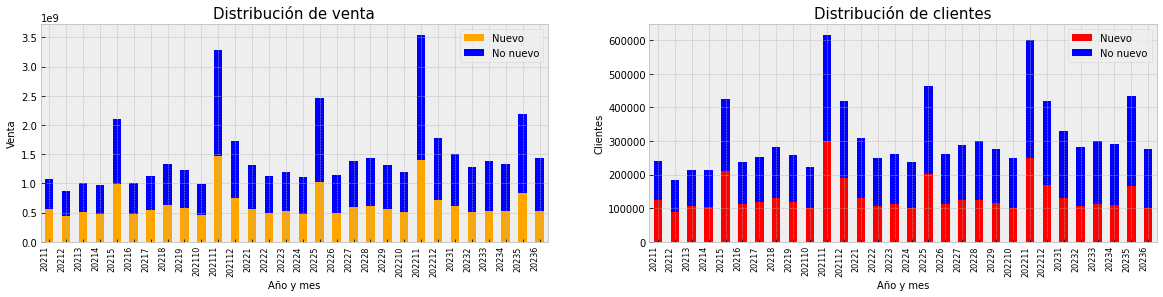

In [8]:
#Con esto idealmente podríamos comprobar si realmente debemos tener ya más interacción de clientes nueovs y no nuevos

df_total_canales = df.groupby(["FECHA DE CREACION","Canal_grouped"]).agg({'Total_venta': np.sum, 'Customer_ID': lambda x: x.nunique(dropna = False), 'Order_ID': lambda x: x.nunique(dropna = False)})

df_total_sales_customer = df.groupby(["Año","Mes","Tipo_cliente"]).agg({'Total_venta': np.sum, 'Customer_ID': lambda x: x.nunique(dropna = False), 'Order_ID': lambda x: x.nunique(dropna = False)}).reset_index()
df_total_sales_customer["Añomes"] = df_total_sales_customer["Año"].map(str) + df_total_sales_customer["Mes"].map(str) 
df_total_sales_customer["Ticket promedio"] = df_total_sales_customer["Total_venta"] / df_total_sales_customer["Order_ID"] 
df_total_sales_customer["Frecuencia_compra"] = df_total_sales_customer["Order_ID"] / df_total_sales_customer["Customer_ID"] 

###################################
df_grouped_sales = pd.DataFrame({'Añomes': df_total_sales_customer.loc[:,"Añomes"].drop_duplicates().drop_duplicates(), "Nuevo" : df_total_sales_customer[df_total_sales_customer["Tipo_cliente"] == "Nuevo"].loc[:,"Total_venta"].values, "No nuevo" : df_total_sales_customer[df_total_sales_customer["Tipo_cliente"] == "No nuevo"].loc[:,"Total_venta"].values})
df_grouped_customer = pd.DataFrame({'Añomes': df_total_sales_customer.loc[:,"Añomes"].drop_duplicates().drop_duplicates(), "Nuevo" : df_total_sales_customer[df_total_sales_customer["Tipo_cliente"] == "Nuevo"].loc[:,"Customer_ID"].values, "No nuevo" : df_total_sales_customer[df_total_sales_customer["Tipo_cliente"] == "No nuevo"].loc[:,"Customer_ID"].values})

#df_grouped_sales

fig, ax_ = plt.subplots(1,2, figsize = (20,4))

k1 = df_grouped_sales.plot(kind = 'bar',x = "Añomes", stacked=True, color = ['orange','blue'], ax = ax_[0])
k1.set_xlabel('Año y mes', fontsize = 10)
k1.set_ylabel('Venta', fontsize=10)
k1.set_title("Distribución de venta", fontsize = 15, horizontalalignment = "center")

xtick_loc = k1.get_xticks()
xtick_labels = df_total_sales["Añomes"].drop_duplicates().values
# Set the x-axis ticks
k1.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 90, ha = 'right', fontsize = 8)


k2 = df_grouped_customer.plot(kind = 'bar',x = "Añomes", stacked=True, color = ['red','blue'], ax = ax_[1])
k2.set_xlabel('Año y mes', fontsize = 10)
k2.set_ylabel('Clientes', fontsize=10)
k2.set_title("Distribución de clientes", fontsize = 15, horizontalalignment = "center")

xtick_loc = k1.get_xticks()
xtick_labels = df_total_sales["Añomes"].drop_duplicates().values
# Set the x-axis ticks
k2.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 90, ha = 'right', fontsize = 8)

plt.plot()

En los años 2020 y 2021 nuestra proporición de clientes nuevos y no nuevos (también venta) se ve ligeramente inclinado hacia clientes nuevos. Principalmente por efectos de pandemia y **canibalización de clientes físicos al ecossitema ecommerce**.

Si observamos durante el 2023, y los últimos meses del 2022. vemos una relación de clientes nuevos vs no nuevos en un 40% - 60%, esto es, nuestra venta ya empieza componerse a través de clientes no nuevos, lo cual es un buen punto que hace pensar que nuestros clientes nos tienen en el top of mind como sitio preferido de compra. También, empezamos a ver fidelización de nuestros clientes. 

**Sugerencia:** Dado que nuestra venta empieza a componerse más de clientes no nuevos, prestar atención en estrategias comerciales de retención es importante para evitar el Churn ppor arte de éstos. 

#### **Exploración de los ratios de cancelación. ¿Dónde estamos parado respecto a las cancelaciones?**

[]

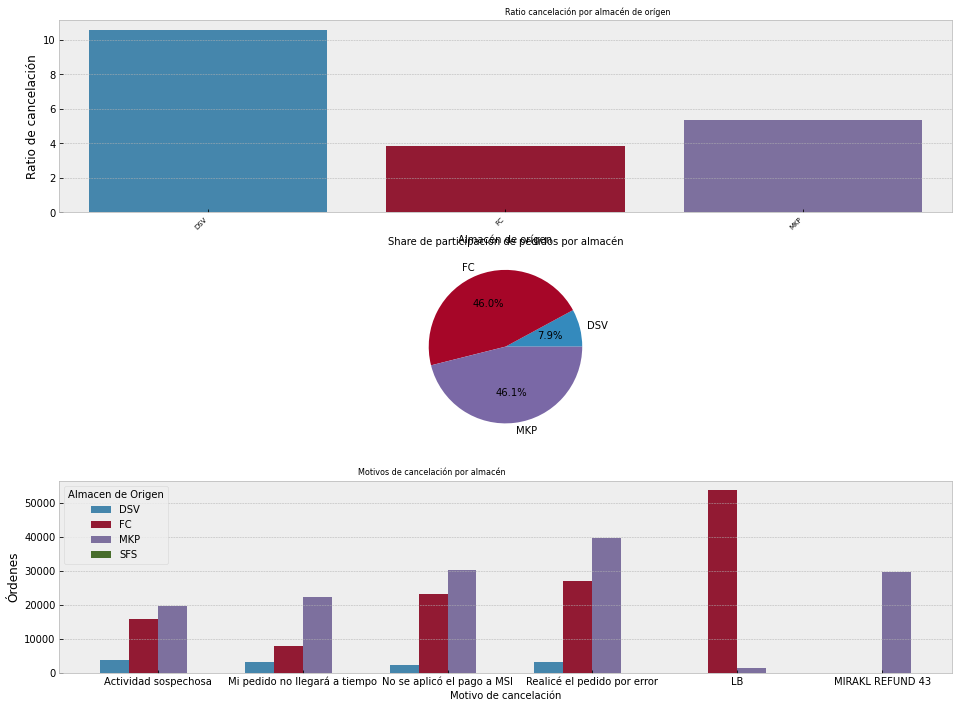

In [9]:
"""
 Hipótesis

 El formato Marketplace es quien genera el mayor volumen de cancelaciones y los reasons de cancelaciones se atribuyen a motivos por CLIENTE y no por 
 culpa de negocio (e.g Inventarios bajos)
 
"""
df_pagados = df[df["STATUS KEY"] == 1.0].groupby(["Año","Mes","Almacen de Origen"]).agg({'Order_ID': lambda x: x.nunique()}).reset_index()
df_pagados.rename(columns={'Order_ID':"Pedidos_pagados"}, inplace=True)
df_cancelados = df[df["STATUS KEY"] == 0.0].groupby(["Año","Mes","Almacen de Origen"]).agg({'Order_ID': lambda x: x.nunique()}).reset_index()
df_cancelados.rename(columns={'Order_ID':"Pedidos_cancelados"}, inplace=True)

df_pagados.loc[:,"Pedidos_pagados"] = df_pagados.loc[:,"Pedidos_pagados"].fillna(0) 
df_cancelados.loc[:,"Pedidos_cancelados"] = df_cancelados.loc[:,"Pedidos_cancelados"].fillna(0)

df_total = pd.concat([df_pagados,df_cancelados], axis= 0).reset_index()
df_total = df_total.groupby(["Año","Mes","Almacen de Origen"]).sum().reset_index()

df_total["Pedidos_totales"] = df_total["Pedidos_pagados"] + df_total["Pedidos_cancelados"]
df_total["Ratio_cancelacion"] = 100 * (df_total["Pedidos_cancelados"] /  (df_total["Pedidos_pagados"] + df_total["Pedidos_cancelados"]))
df_total["Año_mes"] = df_total["Año"].map(str) + df_total["Mes"].map(str)

df_almacen = df_total.groupby(["Almacen de Origen"])["Pedidos_cancelados","Pedidos_totales"].sum().reset_index()
df_almacen["Ratio_cancelacion"] =  100 * (df_almacen["Pedidos_cancelados"] / df_almacen["Pedidos_totales"])
df_almacen = df_almacen[df_almacen["Almacen de Origen"] != "SFS"]

f, a_ = plt.subplots(3,1, figsize = (16,12))
k1 = sns.barplot(data = df_almacen, x = "Almacen de Origen", y = "Ratio_cancelacion",ax = a_[0])
k1.set_xlabel('Almacén de orígen', fontsize = 10)
k1.set_ylabel('Ratio de cancelación')
k1.set_title("Ratio cancelación por almacén de orígen", fontsize = 8, horizontalalignment = "left")
# Get x-axis tick locations and labels
xtick_loc = k1.get_xticks()
xtick_labels = df_almacen["Almacen de Origen"].drop_duplicates()

# Set the x-axis ticks
k1.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 7)


df_almacen.set_index("Almacen de Origen",inplace=True)
a_[1].pie(df_almacen.Pedidos_totales, labels = df_almacen.index, autopct = '%1.1f%%')
#a_[0].set_xlabel('Año / Mes', fontsize = 10)
#a_[0].set_ylabel('Ingreso prom.')
a_[1].set_title("Share de participación de pedidos por almacén", fontsize = 10, horizontalalignment = "center")
# Get x-axis tick locations and labels


#################
df_motivos = df[df["STATUS KEY"] == 0.0].groupby(["Almacen de Origen","Motivo de cancelacion"]).agg({'Order_ID': lambda x : x.nunique()}).reset_index()
df_motivos = df_motivos[df_motivos["Motivo de cancelacion"] != "SFS"]

top_10_motivos = df[df["STATUS KEY"] == 0.0].groupby(["Motivo de cancelacion"]).agg({'Order_ID': lambda x : x.nunique()}).sort_values(by = "Order_ID", ascending = False).reset_index()
top_10_motivos = top_10_motivos["Motivo de cancelacion"][:6]

df_motivos = df_motivos[df_motivos.loc[:,"Motivo de cancelacion"].isin(top_10_motivos)]

k3 = sns.barplot(data = df_motivos, x = "Motivo de cancelacion", y = "Order_ID",hue = "Almacen de Origen",ax = a_[2])
k3.set_xlabel('Motivo de cancelación', fontsize = 10)
k3.set_ylabel('Órdenes')
k3.set_title("Motivos de cancelación por almacén", fontsize = 8, horizontalalignment = "right")
# Get x-axis tick locations and labels
xtick_loc = k2.get_xticks()
xtick_labels = df_total["Año_mes"].drop_duplicates().values

plt.plot()


Vemos que los top motivos de cancelación recae en LB, lo cual , indica cancelaciones por "SIN INVENTARIO". Esto es, el cliente genera una órden de compra, paga el producto y en un rango menor a un día
se cancela la órden en automático sin precio aviso al cliente. BackOrderCancellation refiere al mismo use case.

Por otra parte, vemos también que los clientes cancelan por "No se aplicó el pago a MSI" y "Realicé el pedido por error". El primero sería un reason atribuible al cliente y negocio mientras que el segundo
sería atribuible al cliente. 

Así, veamos que **LAS PRINCIPALES CANCELACIONES RECAEN POR NEGOCIO**. 

Vemos de los dos primeros gráficos que DSV trae mayor ratio de cancelación y en segundo lugar MKP, que es nuestro formato de Marketplace.

Por otra parte, remarcamos que MKP trae una participación más grande que DSV, 43.8% vs 8.6%, lo cual, a pesar de que DSV tiene mayor ratio de cancelación, MKP contribuye en mayor medida 
a que este ratio se mueva. 

**Así, vemos que MARKETPLACE es de nuestros TOP OFFENDERS DE CANCELACIONES.**


#### **Proproción de clientes identificados con "Churn" y "No Churn".** 

Cómo se observa, queremos saber cuantos clientes de nuestra base presentan Churn y no Churn. Como se obsrerva, solo un 19% de la base total presentan Churn. Recordemos que en este caso definimos los clientes con churn sobre aquellos que no han realizado una compra en los últimos 3 meses.

[]

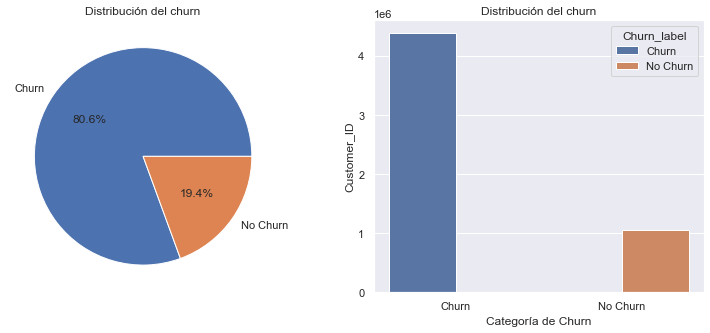

In [61]:
sns.set_theme()

data_ = df_customer.groupby(["Churn_label"])["Customer_ID"].count()
fig,x = plt.subplots(1,2, figsize = (13,5))

x[0].pie(data_, labels = data_.index, autopct = '%1.1f%%')
x[0].set_title("Distribución del churn")

k = sns.barplot(data= data_.reset_index(), x = "Churn_label", y = 'Customer_ID', hue= 'Churn_label', ax = x[1])
k.set_title("Distribución del churn")
k.set_xlabel("Categoría de Churn")

plt.plot()

#### **Relación de clientes con Churn en función del método de pago.**

Nuestros métodos de pago más relevantes, de la exploración de análisis exploratorio, son los siguientes: 

1. Tarjeta de crédito
2. Pago en tienda
3. Tarjeta de débito
4. Paypal
5. Cashi

En el gráfico inferior, colocamos la proporción de clientes con churn divididos por el método de pago. 

Observamos que el método de pago de tarjeta de Crédito presenta el menor Churn: 78%, mientras que el método de pago con mayor Churn corresponde a **"Pago en tienda"** con 83%. 

Cabe destacar que Tarjeta de crédito tendría el menor Churn dada las promociones financieras que se ofrecen a los clientes para la compra de productos de mercancías generales.

Algo interesante es que Cashi, a pesar de no ser representativo en el número de clientes que usarón en su última compra este método de pago no es representativo, se observa que presenta el menor de la proporción del Churn, tan solo un 60%.

[]

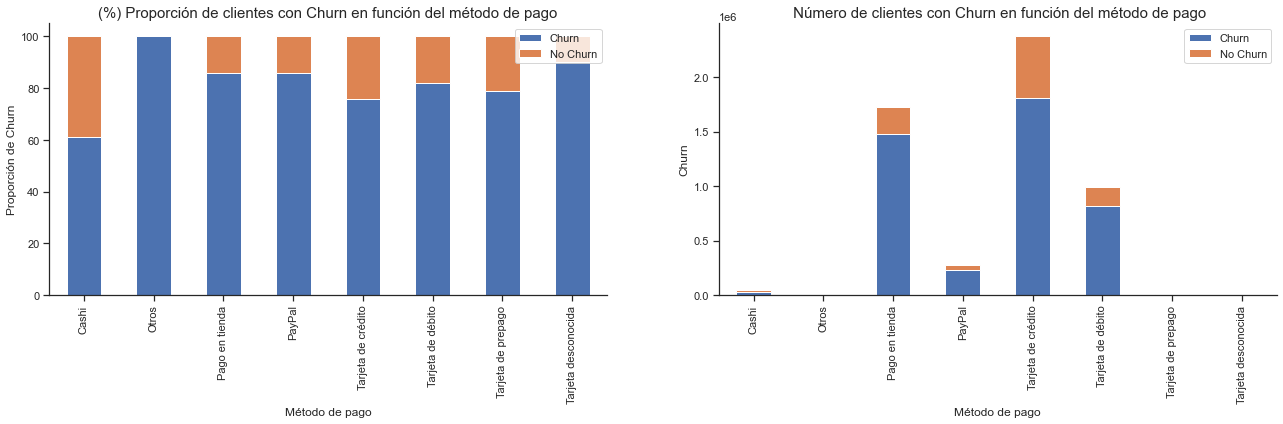

In [49]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

data_ = df_customer.groupby(["tipo de pago","Churn_label"])["Customer_ID"].count().reset_index()

new_data = pd.merge(data_, data_.groupby(["tipo de pago"])["Customer_ID"].sum().reset_index(), how = 'left', left_on=["tipo de pago"], right_on=["tipo de pago"])
new_data["Share"] = 100*np.round(new_data.loc[:,"Customer_ID_x"] / new_data.loc[:,"Customer_ID_y"],2)

graph_1 = pd.pivot_table(new_data, values='Share', index=["tipo de pago"],columns=["Churn_label"]).reset_index()
graph_1["No Churn"] = graph_1["No Churn"].fillna(0)
graph_1["Churn"] = graph_1["Churn"].fillna(0)

graph_2 = pd.pivot_table(new_data, values='Customer_ID_x', index=["tipo de pago"],columns=["Churn_label"]).reset_index()
graph_2["No Churn"] = graph_2["No Churn"].fillna(0)
graph_2["Churn"] = graph_2["Churn"].fillna(0)


fig, k = plt.subplots(1,2, figsize = (22,5))

x = graph_1.plot(x = "tipo de pago", kind = 'bar', stacked=True, ax = k[0])

x.set_title("(%) Proporción de clientes con Churn en función del método de pago", fontsize = 15)
x.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
x.set_xlabel("Método de pago")
x.set_ylabel("Proporción de Churn")


y = graph_2.plot(x = "tipo de pago", kind = 'bar', stacked=True, ax = k[1])

y.set_title(" Número de clientes con Churn en función del método de pago", fontsize = 15)
y.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
y.set_xlabel("Método de pago")
y.set_ylabel("Churn")

plt.plot()


#### **Relación de clientes con Churn en función del Canal de compra de donde sale nuestra mercancía para el cliente final.**

Respecto a los canales de compra, vemos que **"Kiosco_A"**, el cual, ofrece a nuestros clientes la posibilidad de realizar una compra de ecommerce a través de un módulo colocado en una tienda física, presenta el mayor Churn sobre todos los canales de compra. También implica el canal **"Kiosco_B"** bajo la misma modalidad.

Esto nos remarca que los canales digitales como el sitio Web o la App presentan menor Churn dado que son canales de compra más accesibles para nuestros clientes, mientras que en la tienda física la recurrencia de visita al módulo de tienda tendería a ser menor. 

[]

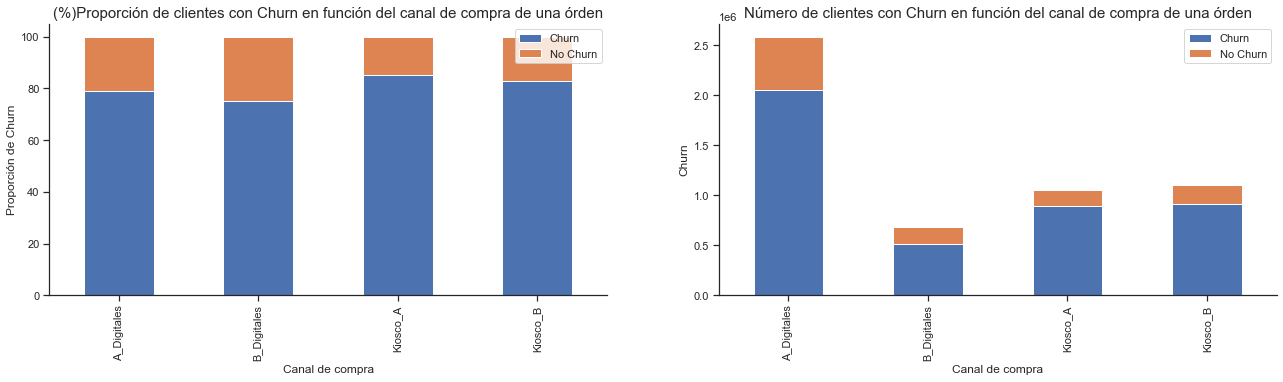

In [51]:

data_ = df_customer.groupby(["Canal_grouped","Churn_label"])["Customer_ID"].count().reset_index()

new_data = pd.merge(data_, data_.groupby(["Canal_grouped"])["Customer_ID"].sum().reset_index(), how = 'left', left_on=["Canal_grouped"], right_on=["Canal_grouped"])
new_data["Share"] = 100*np.round(new_data.loc[:,"Customer_ID_x"] / new_data.loc[:,"Customer_ID_y"],2)

graph_1 = pd.pivot_table(new_data, values='Share', index=["Canal_grouped"],columns=["Churn_label"]).reset_index()
graph_1["No Churn"] = graph_1["No Churn"].fillna(0)
graph_1["Churn"] = graph_1["Churn"].fillna(0)

graph_2 = pd.pivot_table(new_data, values='Customer_ID_x', index=["Canal_grouped"],columns=["Churn_label"]).reset_index()
graph_2["No Churn"] = graph_2["No Churn"].fillna(0)
graph_2["Churn"] = graph_2["Churn"].fillna(0)


fig, k = plt.subplots(1,2, figsize = (22,5))

x = graph_1.plot(x = "Canal_grouped", kind = 'bar', stacked=True, ax = k[0])

x.set_title("(%)Proporción de clientes con Churn en función del canal de compra de una órden", fontsize = 15)
x.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
x.set_xlabel("Canal de compra")
x.set_ylabel("Proporción de Churn")


y = graph_2.plot(x = "Canal_grouped", kind = 'bar', stacked=True, ax = k[1])

y.set_title("Número de clientes con Churn en función del canal de compra de una órden", fontsize = 15)
y.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
y.set_xlabel("Canal de compra")
y.set_ylabel("Churn")

plt.plot()


#### **Relación de clientes con Churn en función del nodo de donde sale nuestra mercancía para el cliente final.**

Vemos que el Churn , en función del nodo de orígen "DSV", presenta mayor Churn por parte de nuestros clientes. Esto se debería a los diferentes factores que actualmente generan una mala experiencia de compra como la entrega tardía de los productos, entregas incompletas de productos o los altos tiempos de procesamiento de las órdenes de cara al cliente final.

A pesar de que en la exploración de la sección I de EDA vimos que **MKP es un nodo con alto impacto** en temas de cancelaciones de órdenes por parte de nuestros clientes, presenta el menor Churn que todos los nodos, con **78% del Churn agrupado**. Esto sería al gran assortment de productos que nuestros clientes pueden encontrar a través del Marketplace lo cual incentiva la compra por parte de nuestros clientes.

Esta variable de Churn presentería, de acuerdo con el análisis anterior, una variabilidad particular en función del nodo de orígen de la mercancía.

[]

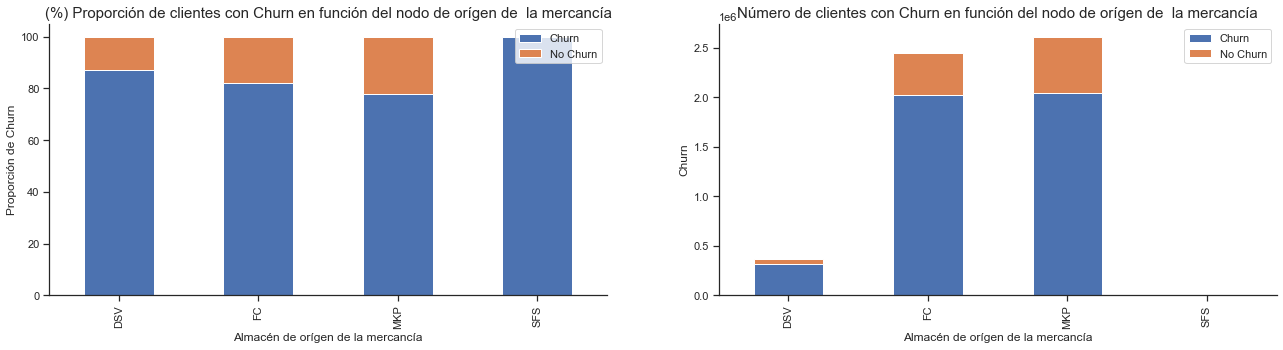

In [53]:
data_ = df_customer.groupby(["Almacen de Origen","Churn_label"])["Customer_ID"].count().reset_index()

new_data = pd.merge(data_, data_.groupby(["Almacen de Origen"])["Customer_ID"].sum().reset_index(), how = 'left', left_on=["Almacen de Origen"], right_on=["Almacen de Origen"])
new_data["Share"] = 100*np.round(new_data.loc[:,"Customer_ID_x"] / new_data.loc[:,"Customer_ID_y"],2)

graph_1 = pd.pivot_table(new_data, values='Share', index=["Almacen de Origen"],columns=["Churn_label"]).reset_index()
graph_1["No Churn"] = graph_1["No Churn"].fillna(0)
graph_1["Churn"] = graph_1["Churn"].fillna(0)

graph_2 = pd.pivot_table(new_data, values='Customer_ID_x', index=["Almacen de Origen"],columns=["Churn_label"]).reset_index()
graph_2["No Churn"] = graph_2["No Churn"].fillna(0)
graph_2["Churn"] = graph_2["Churn"].fillna(0)


fig, k = plt.subplots(1,2, figsize = (22,5))

x = graph_1.plot(x = "Almacen de Origen", kind = 'bar', stacked=True, ax = k[0])

x.set_title("(%) Proporción de clientes con Churn en función del nodo de orígen de  la mercancía", fontsize = 15)
x.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
x.set_xlabel("Almacén de orígen de la mercancía")
x.set_ylabel("Proporción de Churn")


y = graph_2.plot(x = "Almacen de Origen", kind = 'bar', stacked=True, ax = k[1])

y.set_title("Número de clientes con Churn en función del nodo de orígen de  la mercancía", fontsize = 15)
y.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
y.set_xlabel("Almacén de orígen de la mercancía")
y.set_ylabel("Churn")

plt.plot()

#### **Relación de clientes con Churn en función del Carrier de entrega que entrega la mercancía al cliente final (Last Mile).**

Observemos que los carrieres más representativos en los cuales nuestros clientes han comprado es el siguiente:

1. MXFDD - Flota dedicada propiedad de la compañía.
2. MX-FEDX - Flota externa (FEDEX)
3. MXFDD - Flota externda (DHL)

Vemos que la paquetera DHL y FEDEX presentan el mayor de los Churn respecto a la entrega de la mercancía de nuestros clientes. Esto, dado que pueden presentar dificultades en los niveles de servicio de nuestros clientes respecto a los tiempos de entrega y resolución de dudas del estatus de la mercancía. Flota dedicada (MXDFDD), dado que este es administrado por la compañía, presenta el menor churn dado que los tiempos de optimización se operan desde a logística propia y no depende de los niveles de servicio que una paquetera externa pueda ofrecer de acuerdo con su capacidad.

Vemos que **Seller_Owned**, siendo el método de entrega autónomo por parte de los sellers de Marketplace, presenta el menor del Churn, con **65%.** 

[]

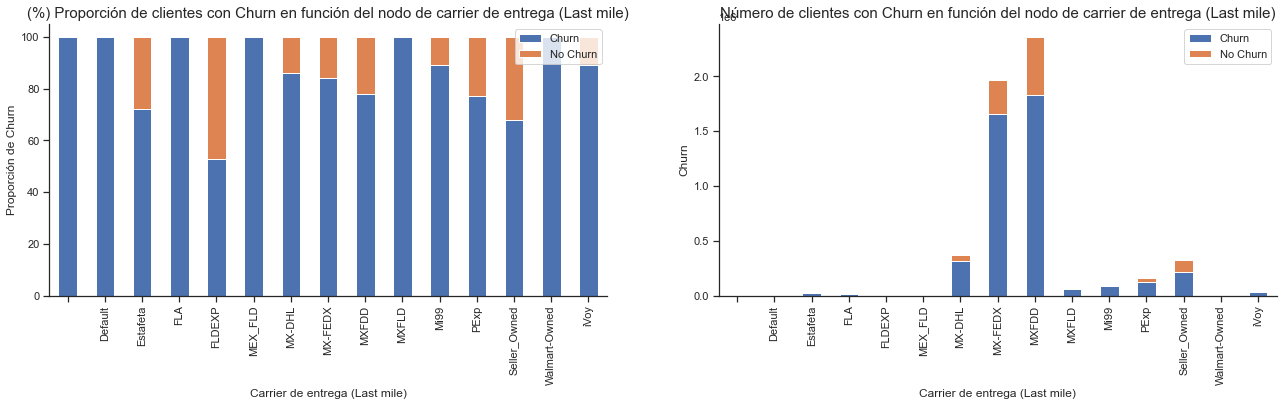

In [13]:

data_ = df_customer.groupby(["Carrier","Churn_label"])["Customer_ID"].count().reset_index()

new_data = pd.merge(data_, data_.groupby(["Carrier"])["Customer_ID"].sum().reset_index(), how = 'left', left_on=["Carrier"], right_on=["Carrier"])
new_data["Share"] = 100*np.round(new_data.loc[:,"Customer_ID_x"] / new_data.loc[:,"Customer_ID_y"],2)

graph_1 = pd.pivot_table(new_data, values='Share', index=["Carrier"],columns=["Churn_label"]).reset_index()
graph_1["No Churn"] = graph_1["No Churn"].fillna(0)
graph_1["Churn"] = graph_1["Churn"].fillna(0)

graph_2 = pd.pivot_table(new_data, values='Customer_ID_x', index=["Carrier"],columns=["Churn_label"]).reset_index()
graph_2["No Churn"] = graph_2["No Churn"].fillna(0)
graph_2["Churn"] = graph_2["Churn"].fillna(0)


fig, k = plt.subplots(1,2, figsize = (22,5))

x = graph_1.plot(x = "Carrier", kind = 'bar', stacked=True, ax = k[0])

x.set_title("(%) Proporción de clientes con Churn en función del nodo de carrier de entrega (Last mile)", fontsize = 15)
x.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
x.set_xlabel("Carrier de entrega (Last mile)")
x.set_ylabel("Proporción de Churn")


y = graph_2.plot(x = "Carrier", kind = 'bar', stacked=True, ax = k[1])

y.set_title("Número de clientes con Churn en función del nodo de carrier de entrega (Last mile)", fontsize = 15)
y.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
y.set_xlabel("Carrier de entrega (Last mile)")
y.set_ylabel("Churn")

plt.plot()


#### **Relación de clientes con Churn en función del tipo de Clientes, esto es, entre Clientes nuevos o No Nuevos.**

Es interesante observar como los clientes nuevos presentan mayor Churn que un cliene no nuevo. Es decir, hay más clientes con Churn para los que realizan una primer compra en nuestro negocio de ecommerce.

Esto podría ser debido a diferentes circunstancias dentro de la experience de compra de nuestros clientes, la primer impresión nos diría que es muy importante para mantener a un cliente recurrente comprando en nuestro website. Así, debemos cuidar cada uno de los elementos de la experiencia de compra para los nuevos allegados al negocio.

[]

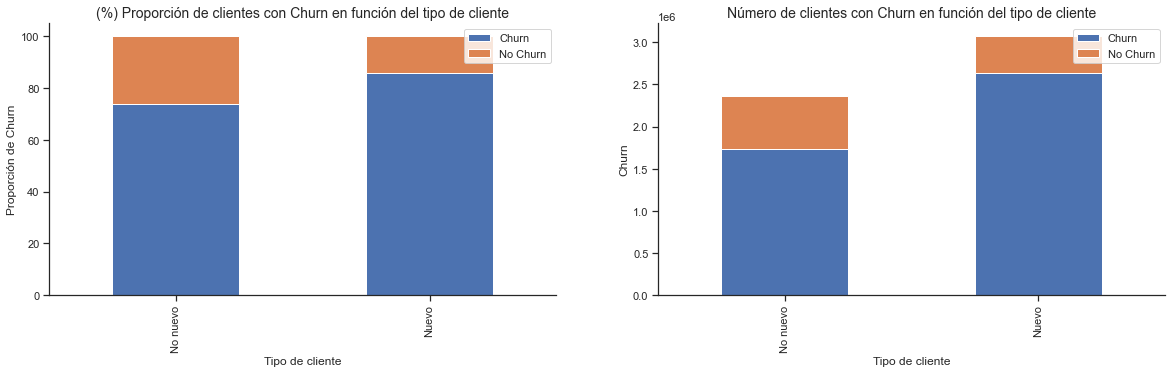

In [12]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
data_ = df_customer.groupby(["Tipo_cliente","Churn_label"])["Customer_ID"].count().reset_index()


new_data = pd.merge(data_, data_.groupby(["Tipo_cliente"])["Customer_ID"].sum().reset_index(), how = 'left', left_on=["Tipo_cliente"], right_on=["Tipo_cliente"])
new_data["Share"] = 100*np.round(new_data.loc[:,"Customer_ID_x"] / new_data.loc[:,"Customer_ID_y"],2)

graph_1 = pd.pivot_table(new_data, values='Share', index=["Tipo_cliente"],columns=["Churn_label"]).reset_index()
graph_1["No Churn"] = graph_1["No Churn"].fillna(0)
graph_1["Churn"] = graph_1["Churn"].fillna(0)

graph_2 = pd.pivot_table(new_data, values='Customer_ID_x', index=["Tipo_cliente"],columns=["Churn_label"]).reset_index()
graph_2["No Churn"] = graph_2["No Churn"].fillna(0)
graph_2["Churn"] = graph_2["Churn"].fillna(0)


fig, k = plt.subplots(1,2, figsize = (20,5))

x = graph_1.plot(x = "Tipo_cliente", kind = 'bar', stacked=True, ax = k[0])

x.set_title("(%) Proporción de clientes con Churn en función del tipo de cliente", fontsize = 14)
x.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
x.set_xlabel("Tipo de cliente")
x.set_ylabel("Proporción de Churn")


y = graph_2.plot(x = "Tipo_cliente", kind = 'bar', stacked=True, ax = k[1])

y.set_title("Número de clientes con Churn en función del tipo de cliente", fontsize = 14)
y.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
y.set_xlabel("Tipo de cliente")
y.set_ylabel("Churn")

plt.plot()


#### **Distribución de la tasa de descuentos sobre la venta entre aquellos clientes con "Churn" y "No Churn"**

En la siguiente gráfica mostramos como se observa la distribución de los descuentos entre aquellos clientes que presentan Churn y "No Churn".

Si observamos con cuidado, tenemos una distirbución con bias y sesgo hacia la izquierda en la distribución de los descuentos para aquellos clientes con "Churn". Esto denotaría un menor uso de descuentos y promociones por parte de aquellos clientes que dejaron de comprar con el negocio. 

Por otra parte, los clientes sin Churn tienen una variabilidad más pronunciada respecto a los ratios o promociones de descuentos aplicados, sin embargo, esta variación parece no ser significativa.

Text(0, 0.5, 'Distribución de los descuentos asociados a la venta')

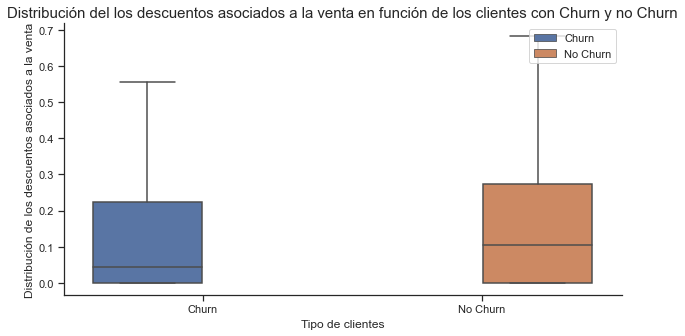

In [82]:
fig ,k= plt.subplots(figsize = (10,5))

fig1 = sns.boxplot(data=df_customer, y = 'Discount_ratio', x = 'Churn_label', hue = 'Churn_label', showfliers = False , ax = k)
fig1.set_title("Distribución del los descuentos asociados a la venta en función de los clientes con Churn y no Churn", fontsize = 15)
fig1.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
fig1.set_xlabel("Tipo de clientes")
fig1.set_ylabel("Distribución de los descuentos asociados a la venta")


#### **Distribución del ticket promedio entre aquellos clientes con "Churn" y "No Churn" (con outliers y sin outliers)**

Graficamos como se observa el ticket promedio entre aquellos clientes con Churn y no Churn. 

Cabe destacar el gran número de Tickets atípicos para aquellos clientes que presentan **Churn.** 

Sin embargo, graficando la distribución de nuestros tickets sin la consideración de valores atípicos, no se observa una variación importante entre los clientes que presentan Churn y los que no. Esto nos diría también que el mix de categorías o preferencia de compra de categorías entre los clientes que compran y que dejaron de comprar serían equivalentes o muy parecidas.

Text(0, 0.5, 'Ticket promedio')

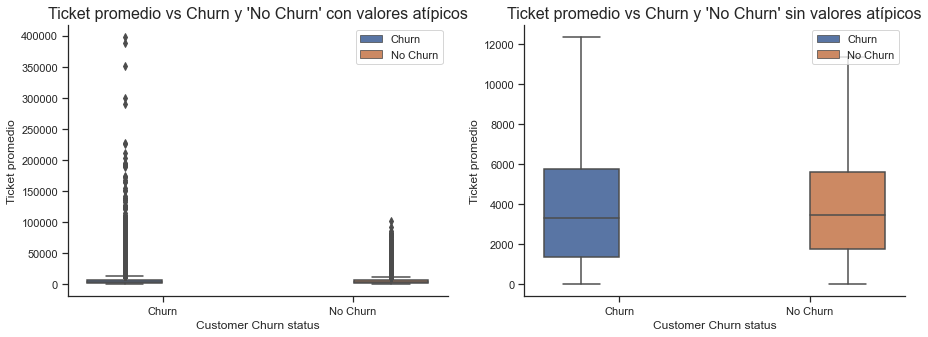

In [79]:
fig ,x= plt.subplots(1,2,figsize = (15,5))
#fig1 = sns.boxplot(data=df_customer, y = 'Avg_order_value', x = 'Churn_label', hue = 'Churn_label', showfliers = False , ax = x)
fig1 = sns.boxplot(data=df_customer, y = 'Avg_order_value', x = 'Churn_label', hue = 'Churn_label',  ax = x[0])

fig1.set_title("Ticket promedio vs Churn y 'No Churn' con valores atípicos", fontsize = 16)
fig1.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
fig1.set_xlabel("Customer Churn status")
fig1.set_ylabel("Ticket promedio")

fig2 = sns.boxplot(data=df_customer, y = 'Avg_order_value', x = 'Churn_label', hue = 'Churn_label', showfliers = False,  ax = x[1])

fig2.set_title("Ticket promedio vs Churn y 'No Churn' sin valores atípicos", fontsize = 16)
fig2.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
fig2.set_xlabel("Customer Churn status")
fig2.set_ylabel("Ticket promedio")

#### **Distribución de la 'Recencia' de compra de clientes con Churn y no Churn**

La recencia de los clientes que no presentan Churn es esparadamente menor, esto, debido a que son aquellos clientes en los cuales siguen realizando compras de manera frecuente. Así, el tiempo que pasa entre la compra más reciente será significativamente menor impulsando la frecuencia de compra. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Recencia')

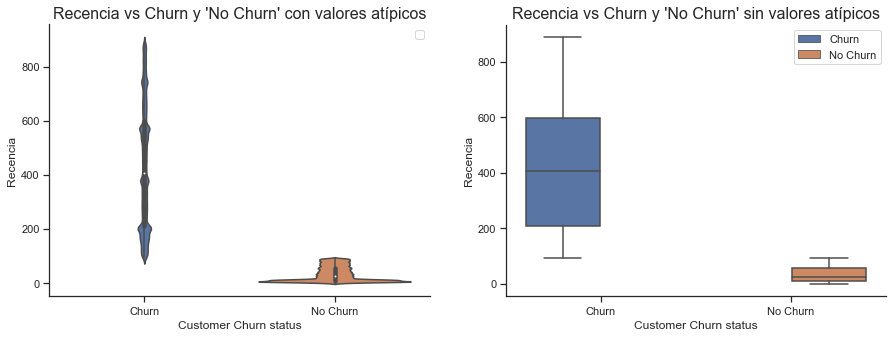

In [78]:
#Recency
fig ,x= plt.subplots(1,2,figsize = (15,5))
#fig1 = sns.boxplot(data=df_customer, y = 'Avg_order_value', x = 'Churn_label', hue = 'Churn_label', showfliers = False , ax = x)
fig1 = sns.violinplot(data=df_customer, x = 'Churn_label', y = 'Recency',ax = x[0])

fig1.set_title("Recencia vs Churn y 'No Churn' con valores atípicos", fontsize = 16)
fig1.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
fig1.set_xlabel("Customer Churn status")
fig1.set_ylabel("Recencia")

fig2 = sns.boxplot(data=df_customer, y = 'Recency', x = 'Churn_label', hue = 'Churn_label', showfliers = False,  ax = x[1])

fig2.set_title("Recencia vs Churn y 'No Churn' sin valores atípicos", fontsize = 16)
fig2.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
fig2.set_xlabel("Customer Churn status")
fig2.set_ylabel("Recencia")

#### **Distribución de basket size (tamaño de canasta) entre los clientes con Churn y no Churn** 

Respecto al basket size, observamos que los clientes con Churn se componen principalmente de datos atípicos con el modelo interquantil. Por lo que parece que, de acuerdo con este modelo, existe una gran variabilidad entre los productos que agregan a carrito para la transacción de su compra. Mientras que los clientes con **No Churn**, también se presentan datos atípicos, sin emabrgo, un 75% de esos clientes agregan hasta 1.3 productos por pedido. 

Esto haría sentido con la mercancía que el negocio desplaza, es decir, la mercancía que se desplaza solo son productos de Línea Blanca, Electrodomésticos, Videojuegos, TV y Video, Muebles, etc.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Basket site')

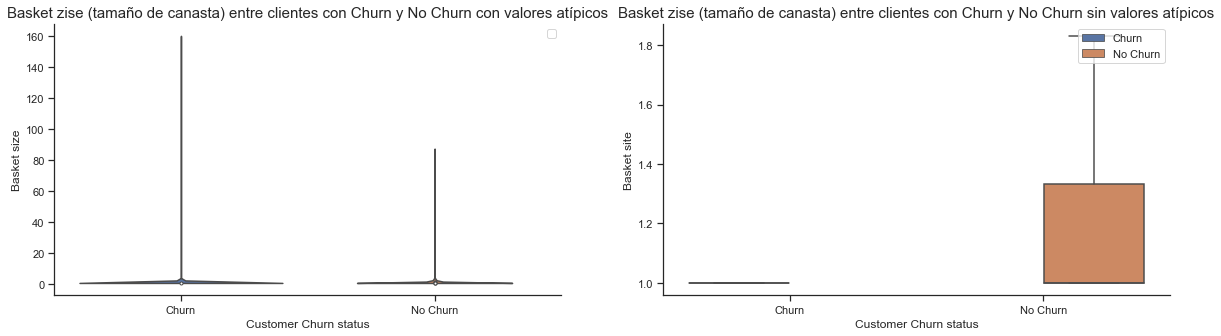

In [90]:
#Basket size
fig ,x= plt.subplots(1,2,figsize = (20,5))

fig1 = sns.violinplot(data=df_customer, x = 'Churn_label', y = 'Avg_basket_size',ax = x[0])
fig1.set_title("Basket zise (tamaño de canasta) entre clientes con Churn y No Churn con valores atípicos", fontsize = 15)
fig1.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
fig1.set_xlabel("Customer Churn status")
fig1.set_ylabel("Basket size")

fig2 = sns.boxplot(data=df_customer, y = 'Avg_basket_size', x = 'Churn_label', hue = 'Churn_label', showfliers = False,  ax = x[1])

fig2.set_title("Basket zise (tamaño de canasta) entre clientes con Churn y No Churn sin valores atípicos", fontsize = 15)
fig2.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
fig2.set_xlabel("Customer Churn status")
fig2.set_ylabel("Basket size")

#### **Ratios de costo de envío entre clientes con Churn y no Churn y su distribución**

El ratio de costo de envío sobre la venta de de clientes con "No Churn" es mayor sobre aquellos que sí (0.6% vs 0.7%). Dicho esto, parece no haber correlación positiva entre el churn y el costo de envío, es decir, mayor costo de envío guiará a mayor "Churn" ya que otros negocios o retailers pueden ofrecer el costo de envío.

[]

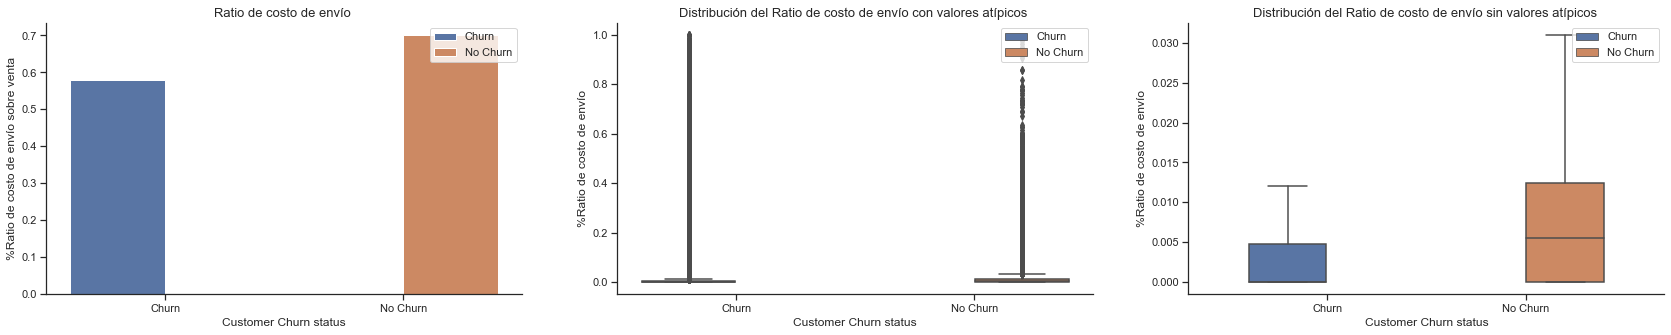

In [112]:
data_ = df_customer.groupby(["Churn_label"]).agg({'Venta bruta sin descuentos con flete': np.sum, 'Flete' :np.sum}).reset_index()
data_["Ratio_shipping"] =data_.loc[:,"Flete"] / data_.loc[:,"Venta bruta sin descuentos con flete"]
data_["Ratio_shipping"] =  np.round(100 *data_.loc[:,"Flete"] / data_.loc[:,"Venta bruta sin descuentos con flete"],2)

fig, x = plt.subplots(1,3,figsize = (29,5))

fig1 = sns.barplot(data=data_, x = 'Churn_label', y = 'Ratio_shipping', hue = 'Churn_label', ax = x[0])
fig1.set_title("Ratio de costo de envío ", fontsize= 13)
fig1.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
fig1.set_xlabel("Customer Churn status")
fig1.set_ylabel("%Ratio de costo de envío sobre venta")

fig2 = sns.boxplot(data=df_customer, x = 'Churn_label', y = 'Avg_Shipment_cost_ratio', hue = 'Churn_label', showfliers = True, ax = x[1])
fig2.set_title("Distribución del Ratio de costo de envío con valores atípicos ", fontsize= 13)
fig2.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
fig2.set_xlabel("Customer Churn status")
fig2.set_ylabel("%Ratio de costo de envío")

fig3 = sns.boxplot(data=df_customer, x = 'Churn_label', y = 'Avg_Shipment_cost_ratio', hue = 'Churn_label', showfliers = False,ax = x[2])
fig3.set_title("Distribución del Ratio de costo de envío sin valores atípicos ", fontsize= 13)
fig3.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
fig3.set_xlabel("Customer Churn status")
fig3.set_ylabel("%Ratio de costo de envío")

plt.plot()


#### **Ratios de cancelación de los clientes con Churn y no Churn** 

En el primer gráfico, se observa que el ratio de cancelaciones entre los clientes que dejaron de comprar (Churn) es menor con aquellos que no tienen Churn. El ratio de los primeros es de 4.5%, mientras que el segundo caso es un 5%. Esto nos diría que los clientes que dejan de comprar no tienen un alto índice de cancelaciones lo cual, a primera instancia, nos diría que las cancelaciones no necesariamente coadyuvan a que un cliente deje de comprar.

Por otra parte, si vemos la perspectiva de ratio de cancelaciones en término de piezas, observamos que tenemos **los mismos ratios en ambos casos.**

[]

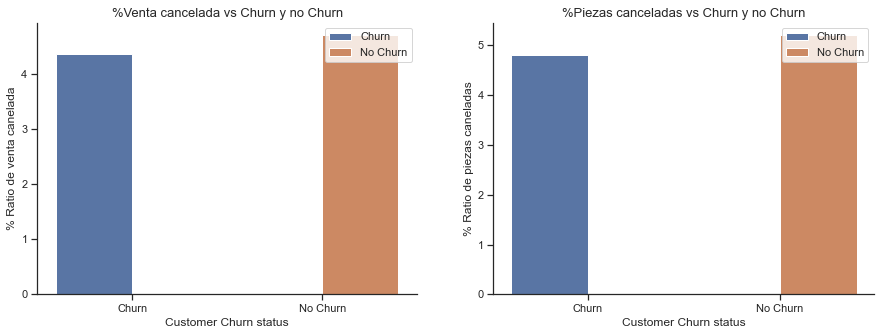

In [104]:
data_ = df_customer.groupby(["Churn_label"]).agg({'Piezas canceladas': np.sum,'Total_piezas': np.sum,'Venta cancelada' : np.sum, 'Total_income' : np.sum}).reset_index()
data_["Ratio_Units"] = np.round(100 * data_.loc[:,"Piezas canceladas"] / data_.loc[:,"Total_piezas"],2)
data_["Ratio_Sales"] = np.round(100 * data_.loc[:,"Venta cancelada"] / data_.loc[:,"Total_income"],2)

fig, x = plt.subplots(1,2,figsize = (15,5))

fig1 = sns.barplot(data=data_, x = 'Churn_label', y = 'Ratio_Sales', hue = 'Churn_label', ax = x[0])
fig1.set_title("%Venta cancelada vs Churn y no Churn", fontsize= 13)
fig1.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
fig1.set_xlabel("Customer Churn status")
fig1.set_ylabel("% Ratio de venta canelada")

fig2 = sns.barplot(data=data_, x = 'Churn_label', y = 'Ratio_Units', hue = 'Churn_label', ax = x[1])
fig2.set_title("%Piezas canceladas vs Churn y no Churn", fontsize = 13)
fig2.legend(loc = 'upper right', fancybox = True, bbox_to_anchor = (1,1))
fig2.set_xlabel("Customer Churn status")
fig2.set_ylabel("% Ratio de piezas caneladas")

plt.plot()

#### **Motivos de cancelacíón más comunes entre aquellos Clientes con "Churn"**

Dentro de los clientes que presentan Churn, se grafican los motivos de cancelaciones más comunes por el cual un cliente termina cancelando su compra.

Resulta interesante observar que el motivo de preocupación más común por el cual un cliente cancela su compra es debido a los tiempo de espera: **"Mi pedidod no llegará a tiempo"**. Este motivo generaría dudas respecto a donde se encuentra la mercancía de nuestro cliente. 

En segundo lugar se observa el motivo **"Realicé el pedido por error"**, en tercer motivo: **"Actividad sospechosa"**, y en cuarto lugar: **"MIRAKL REFUND 15"**. Éste último refiere a cancelaciones por sistema automático cuando no se encuentra inventario disponible para surtir el pedido de un cliente.

Text(0, 0.5, 'Discount ratio')

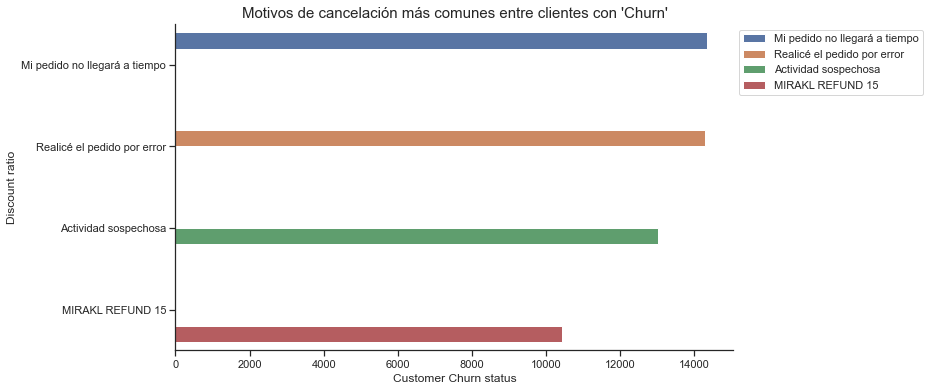

In [84]:
data_ = df_customer[df_customer.loc[:,"Churn_label"] == "Churn"].groupby(["Motivo de cancelacion"])["Customer_ID"].count().reset_index()
data_ = data_.sort_values(by = ["Customer_ID"], ascending = False).reset_index()[1:5]
data_

fig, x = plt.subplots(figsize = (10,6))

fig1 = sns.barplot(data=data_, x = 'Customer_ID', y = 'Motivo de cancelacion', hue = 'Motivo de cancelacion', ax = x)
fig1.set_title("Motivos de cancelación más comunes entre clientes con 'Churn'", fontsize = 15)
fig1.legend(loc = 'upper left', fancybox = True, bbox_to_anchor = (1,1))
fig1.set_xlabel("Customer Churn status")
fig1.set_ylabel("Discount ratio")

### **Análisis de correlación entre las variables del modelo de construcción de Predición de Churn**

##### **Mapa de calor en función de la correlación (Pearson)**

En el siguiente gráfico, mostramos la correlación entre las diferentes variables que se construyeron para la elaboración del modelo de Churn. Esta gráfica nos permite identificar aquellas variables potenciales que permitirían explicar en mejor medida el modelo de Churn así como identificar también aquellas con posible multicolinealidad.

*Para este caso particular, se utiliza la correlación de Pearson.*

<AxesSubplot:>

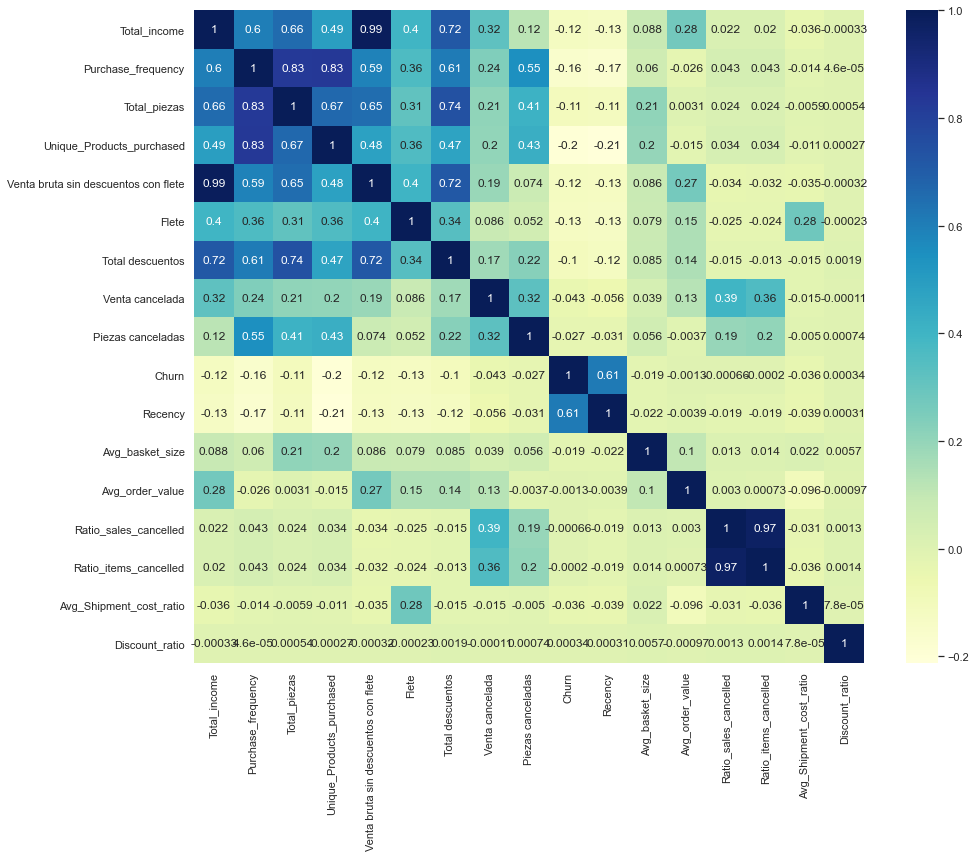

In [73]:
fig, x = plt.subplots(figsize = (15,12))
sns.heatmap(df_customer.corr(), cmap='YlGnBu', annot=True)

Como se observa del gráfico anterior, denotamos algunas de las correlaciones más importantes en función de la fuerza de correlación que se presenta con el coeficiente de Pearson:

1. Piezas canceladas - Total Piezas : 0.41
2. Piezas canceladas - Unique products purchased : 0.43
3. Flete - Total incomer: 0.40
4. Purchase frquency - Piezas canceladas: 0.55
5. Total_piezas - Total descuentos: 0.74
6. Total_income - Average order value : 0.28
7. Avg_shipment_cost_ratio - Total piezas: -0.0059  | Correlación negativa débil o poco significativa
8. Ratio_items_cancelled - Venta bruta sin descuentos con flete: -0.035 | Correlación negativa débil o poco significativa
9. Ratio_sales_cancelled - Recency: -0.019 | Correlación negativa débil o poco significativa
10. Piezas canceladas - Recency: -0.031 | Correlación negativa débil o poco significativa

Dentro de nuestro modelo, a pesar de que ciertas variables por si solas no sean significativas en términos de correlación, se incluirán en el modelo y se analizará la significancia estadística. 

##### **Relación gráfica de las diferentes variables para la construcción de un modelo de predicción de Churn**

Mediante la siguiente gráfica se pretende mostrar los diferentes tipos de relaciones lineales mediante scatterplots de nuestras variables disponibles para la construcción del modelo. Estas relaciones se diferencian en función del tipo de cliente, si presenta Churn o no.  

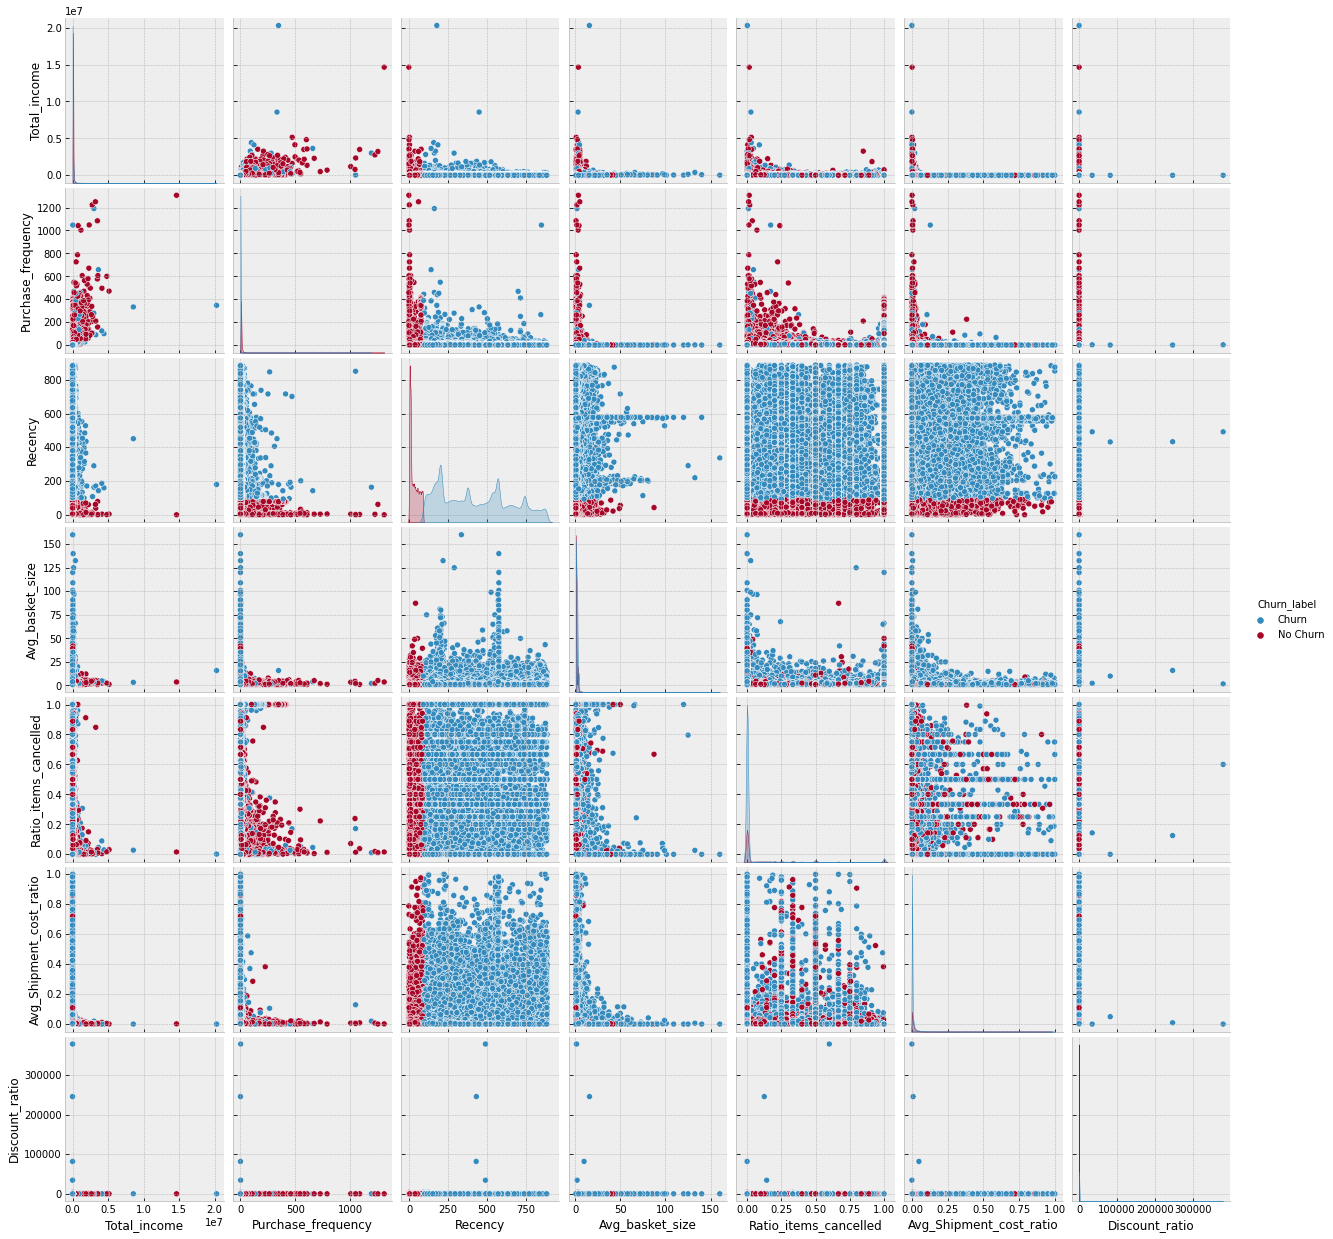

In [7]:
#fig, x = plt.subplots(figsize = (20,20))
sns.pairplot(data = df_customer.loc[:,["Total_income","Purchase_frequency",
                                       "Recency","Avg_basket_size","Ratio_items_cancelled","Avg_Shipment_cost_ratio","Discount_ratio","Churn_label"]], hue= "Churn_label")

##### **Cuantificación de la correlación entre la variable objetivo y las variables independientes que se utilizarán en el modelo de predicción de Churn | Correlación Punto Biserial** 

En este notebbok, se presentó un mapa de calor donde se trata de obtener la correlación lineal entre las diferentes variables para el modelo de Churn, esto, a través del cálculo de la correlación de Pearson. En este caso particular, la varibale Churn es del tipo dicotómica (1 o 0), por lo que se desea estudiar la correlación de dicha variable con las demás variables independientes(e.g. Ticket promedio, total_venta, total_piezas, ratio cancelación, etc). 

Justo para poder realizar este ejercicio, utilizarémos la **correlación biserial puntual**, la cual nos permite obtener esta información entre una varible nominal dicotómica contra variables continuas, el cual, es nuestro caso. 

In [28]:
import scipy.stats as statistics

X_col = ["Total_income","Purchase_frequency","Total_piezas","Unique_Products_purchased","Flete",
                                       "Total descuentos","Venta cancelada","Piezas canceladas","Recency","Avg_basket_size","Ratio_items_cancelled","Avg_Shipment_cost_ratio","Discount_ratio"]
y = df_customer.loc[:,"Churn"].values

l_corr = []
l_pval = []

for var_ in  X_col:  
    (corr,pval) = statistics.pointbiserialr(df_customer.loc[:,var_].values, y)
    l_corr.append(corr)
    l_pval.append(pval)

df_corr = pd.DataFrame(list(zip(X_col,l_corr,l_pval)), columns=["Variable","Correlación","P_value"]) 


Imprime el dataframe de la correlación de cada una de las variables independientes contra la variable dicotómica "Churn"

In [29]:
df_corr

,Variable,Correlación,P_value
0,Total_income,-0.120315,0.000000
1,Purchase_frequency,-0.164102,0.000000
2,Total_piezas,-0.106138,0.000000
3,Unique_Products_purchased,-0.199771,0.000000
4,Flete,-0.125311,0.000000
5,Total descuentos,-0.104475,0.000000
6,Venta cancelada,-0.043272,0.000000
7,Piezas canceladas,-0.027475,0.000000
8,Recency,0.614964,0.000000
9,Avg_basket_size,-0.018877,0.000000


Resulta intersant denotar lo siguiente:

1. **Correlación Total_income - Churn : -0.12 | Esto nos diría que cuando la variable Churn toma valores iguales a 1 (Churn), el total income tenderá a tomar valores menores o a la baja.**
2. **Correlación Purchase_frequency - Churn : -0.16 | Esto nos diría que cuando la variable Churn toma valores iguales a 1 (Churn), la frecuencia de compra  tenderá a tomar valores menores o a la baja.**
3. **Correlación Total_piezas - Churn:  -0.10 | Esto nos diría que cuando la variable Churn toma valores iguales a 1 (Churn), la cantidad de piezas tenderá a ser menor.**

Se listan algúnas de las más interesantes, donde se observa el impacto negativo que la variable churn presenta sobre la venta, la frecuencia de compra y demanda de productos. 

Cabe destacar que de las relaciones mostradas, su p value es de 0, es decir, menor a 0.05. Por lo que es estadísticamente significativo.